In [76]:
import pandas as pd
import numpy as np

In [77]:
# taken from imigrant conjoint data
df = pd.read_excel('/content/rearranged_data.xlsx')
df.head()

,RegisterN,ProfileID,CourseFocus,TeachingMethod,AssessmentType,PracticalExp,IndustryCollab,Rating,Choice
0,2311033,1,CircularEconomy,GuestLecturesfromIndustryExperts,GroupProject,Internship,GuestWorkshop,6,0
1,2311033,2,SustainableBusinessModels,CaseStudies,Presentation,Internship,GuestWorkshop,10,0
2,2311033,3,EnvironmentalMgmt,GuestLecturesfromIndustryExperts,Exams,FieldTrips,GuestWorkshop,6,0
3,2311033,4,SustainableBusinessModels,ProjectBasedLearning,Exams,Simulation,GuestWorkshop,7,0
4,2311033,5,EnvironmentalMgmt,CaseStudies,GroupProject,Simulation,GuestWorkshop,8,0


In [78]:
# checking for empty data
df.isnull().sum()

,0
RegisterN,0
ProfileID,0
CourseFocus,0
TeachingMethod,0
AssessmentType,0
PracticalExp,0
IndustryCollab,0
Rating,0
Choice,0


In [79]:
clean_df = df[~df.Choice.isnull()]

In [80]:
y = clean_df['Choice']
x = clean_df[[x for x in df.columns if x != 'Rating' and x != 'Choice' and x !='RegisterN' and x !='ProfileID']]

In [81]:
xdum = pd.get_dummies(x, columns=[c for c in x.columns if c != 'selected'])
xdum.head()

,CourseFocus_CircularEconomy,CourseFocus_EnvironmentalMgmt,CourseFocus_SustainableBusinessModels,TeachingMethod_CaseStudies,TeachingMethod_GuestLecturesfromIndustryExperts,TeachingMethod_ProjectBasedLearning,AssessmentType_Exams,AssessmentType_GroupProject,AssessmentType_Presentation,PracticalExp_FieldTrips,PracticalExp_Internship,PracticalExp_Simulation,IndustryCollab_GuestWorkshop,IndustryCollab_JointResearch,IndustryCollab_RealWorldProblem
0,True,False,False,False,True,False,False,True,False,False,True,False,True,False,False
1,False,False,True,True,False,False,False,False,True,False,True,False,True,False,False
2,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False
3,False,False,True,False,False,True,True,False,False,False,False,True,True,False,False
4,False,True,False,True,False,False,False,True,False,False,False,True,True,False,False


In [82]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [83]:
res = sm.OLS(y, xdum, family=sm.families.Binomial()).fit()
res.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['family']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Choice   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     2.806
Date:                Mon, 27 Jan 2025   Prob (F-statistic):            0.00206
Time:                        07:22:12   Log-Likelihood:                -49.973
No. Observations:                 663   AIC:                             121.9
Df Residuals:                     652   BIC:                             171.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
CourseFocus_CircularEconomy                        -0.0037      0.017     -0.217      0.829      -0.037       0.030
CourseFocus_EnvironmentalMgmt                       0.0292      0.014      2.044      0.041       0.001       0.057
CourseFocus_SustainableBusinessModels               0.0214      0.014      1.495      0.135      -0.007       0.049
TeachingMethod_CaseStudies                         -0.0126      0.014     -0.883      0.378      -0.041       0.015
TeachingMethod_GuestLecturesfromIndustryExperts    -0.0087      0.014     -0.608      0.543      -0.037       0.019
TeachingMethod_ProjectBasedLearning                 0.0682      0.017      3.999      0.000       0.035       0.102
AssessmentType_Exams                               -0.0022      0.014     -0.151      0.880      -0.030       0.026
AssessmentType_GroupProject                         0.0527      0.014      3.690      0.000       0.025       0.081
AssessmentType_Presentation                        -0.0037      0.017     -0.217      0.829      -0.037       0.030
PracticalExp_FieldTrips                             0.0159      0.017      0.933      0.351      -0.018       0.049
PracticalExp_Internship                             0.0292      0.014      2.044      0.041       0.001       0.057
PracticalExp_Simulation                             0.0018      0.014      0.123      0.902      -0.026       0.030
IndustryCollab_GuestWorkshop                       -0.0165      0.014     -1.157      0.248      -0.045       0.012
IndustryCollab_JointResearch                        0.0094      0.017      0.550      0.583      -0.024       0.043
IndustryCollab_RealWorldProblem                     0.0540      0.014      3.781      0.000       0.026       0.082
==============================================================================
Omnibus:                      419.293   Durbin-Watson:                   2.207
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2612.100
Skew:                           3.002   Prob(JB):                         0.00
Kurtosis:                      10.648   Cond. No.                     1.40e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.01e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

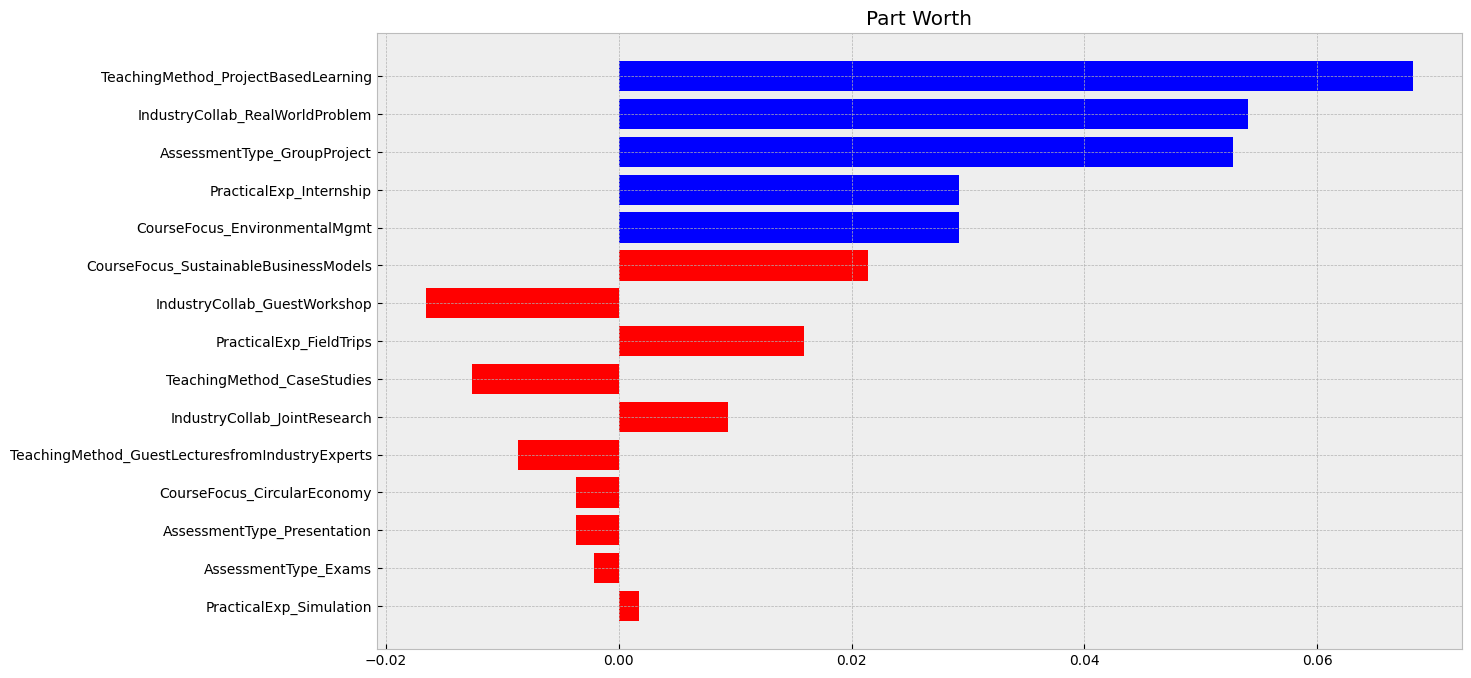

In [84]:
df_res = pd.DataFrame({
    'param_name': res.params.keys()
    , 'param_w': res.params.values
    , 'pval': res.pvalues
})
# adding field for absolute of parameters
df_res['abs_param_w'] = np.abs(df_res['param_w'])
# marking field is significant under 95% confidence interval
df_res['is_sig_95'] = (df_res['pval'] < 0.05)
# constructing color naming for each param
df_res['c'] = ['blue' if x else 'red' for x in df_res['is_sig_95']]

# make it sorted by abs of parameter value
df_res = df_res.sort_values(by='abs_param_w', ascending=True)
f, ax = plt.subplots(figsize=(14, 8))
plt.title('Part Worth')
pwu = df_res['param_w']
xbar = np.arange(len(pwu))
plt.barh(xbar, pwu, color=df_res['c'])
plt.yticks(xbar, labels=df_res['param_name'])
plt.show()

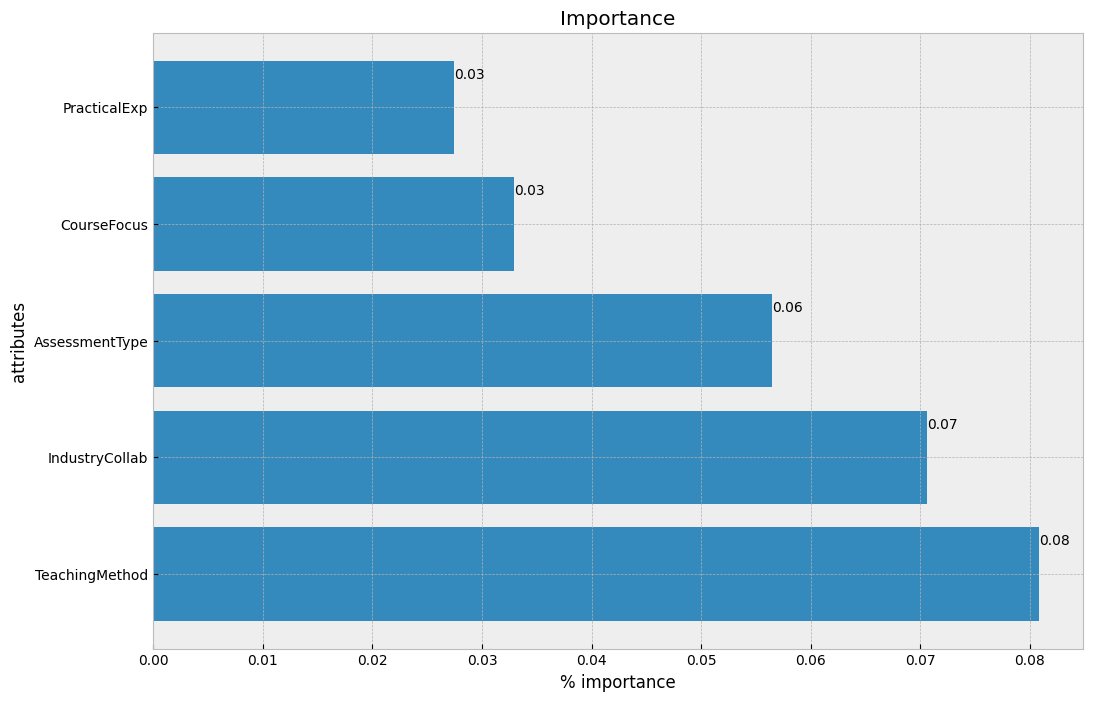

In [85]:
# need to assemble per attribute for every level of that attribute in dicionary
range_per_feature = dict()
for key, coeff in res.params.items():
    sk =  key.split('_')
    feature = sk[0]
    if len(sk) == 1:
        feature = key
    if feature not in range_per_feature:
        range_per_feature[feature] = list()

    range_per_feature[feature].append(coeff)
# importance per feature is range of coef in a feature
# while range is simply max(x) - min(x)
importance_per_feature = {
    k: max(v) - min(v) for k, v in range_per_feature.items()
}

# compute relative importance per feature
# or normalized feature importance by dividing
# sum of importance for all features
total_feature_importance = sum(importance_per_feature.values())
relative_importance_per_feature = {
    k: 100 * round(v/total_feature_importance, 3) for k, v in importance_per_feature.items()
}
alt_data = pd.DataFrame(
    list(importance_per_feature.items()),
    columns=['attr', 'importance']
).sort_values(by='importance', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Importance')
plt.barh(xbar, alt_data['importance'])
for i, v in enumerate(alt_data['importance']):
    ax.text(v , i + .25, '{:.2f}'.format(v))
plt.ylabel('attributes')
plt.xlabel('% importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()

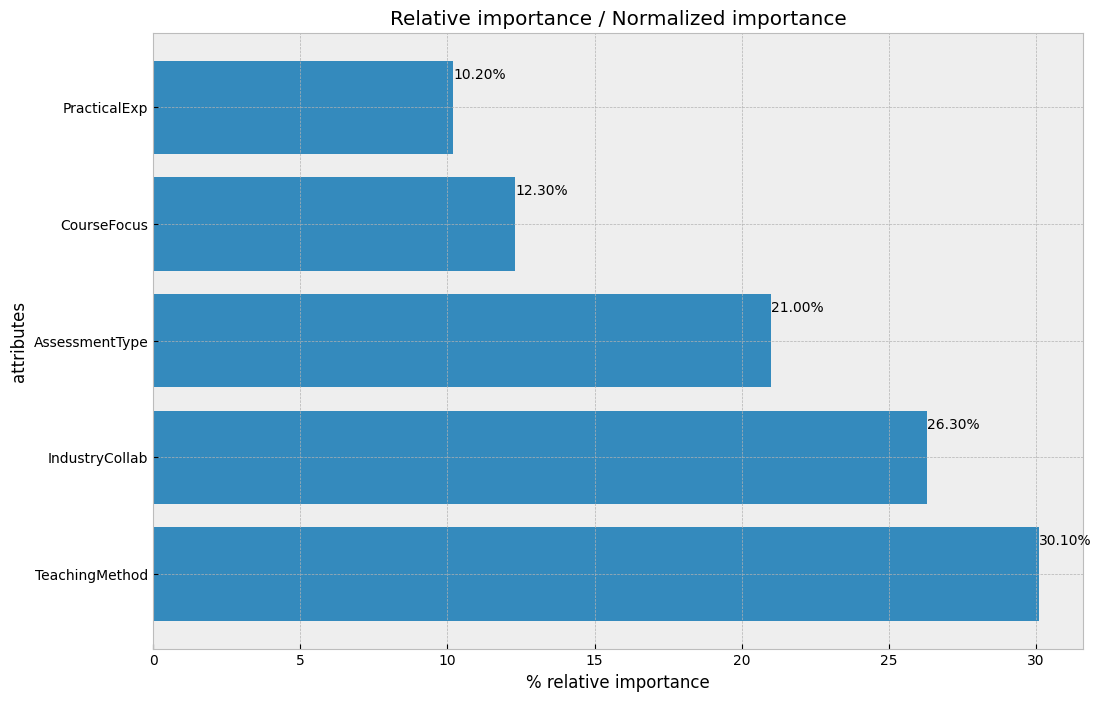

In [86]:
alt_data = pd.DataFrame(
    list(relative_importance_per_feature.items()),
    columns=['attr', 'relative_importance (pct)']
).sort_values(by='relative_importance (pct)', ascending=False)


f, ax = plt.subplots(figsize=(12, 8))
xbar = np.arange(len(alt_data['attr']))
plt.title('Relative importance / Normalized importance')
plt.barh(xbar, alt_data['relative_importance (pct)'])
for i, v in enumerate(alt_data['relative_importance (pct)']):
    ax.text(v , i + .25, '{:.2f}%'.format(v))
plt.ylabel('attributes')
plt.xlabel('% relative importance')
plt.yticks(xbar, alt_data['attr'])
plt.show()